In [72]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sb

In [73]:
from utils.preprocessing import df_to_xy
#fix rnd seed
np.random.seed(0)

MAX_GAIN = 200

# Read and sanitize the data
df = pd.read_excel("../data/UG_HH_NEW_continuous_no200.xls")

# display(df.head())
# df.hist()


In [74]:
from sklearn.linear_model import LinearRegression
from notebooks.utils.preprocessing import df_to_xy

x, y = df_to_xy(df)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 2/5, random_state = 0)



In [75]:
from utils.data_augmentation import DACombine

In [76]:
from models.deep import loss_tf, gain_tf, KerasModel

**Metrics**

In [77]:
from models.metrics import avg_gain_ratio, gain_mean, avg_loss_ratio

**AcceptanceModel**

In [78]:
from models import AcceptanceModel

gain_mean:  84.44444444444444


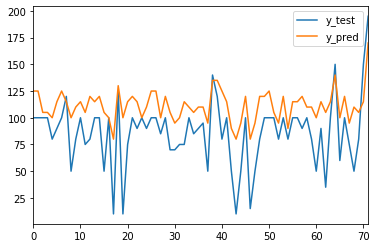

In [79]:
from sklearn.ensemble.bagging import BaggingRegressor, BaggingClassifier, DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import NuSVC, SVC, LinearSVC, LinearSVR, SVR, NuSVR

#LinearSVR, zero_one=True: 87
#SVR, zero_one=True: 70

model = AcceptanceModel(LinearSVR(loss='epsilon_insensitive', ), step=5, zero_one=True)
#model = AcceptanceModel(KerasModel(epochs=300), zero_one=True)
xTrain_, yTrain_ = xTrain, yTrain
#xTrain_, yTrain_ = da.fit_predict(xTrain, yTrain, distribution=True, distance=5, retarget=True, combine=True)
model.fit(xTrain_, yTrain_)
yTrain_[yTrain_ < 50] = 50

yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))

gain_mean:  85.20833333333333


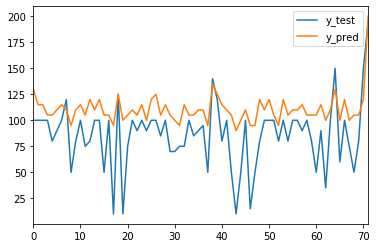

In [80]:
model = AcceptanceModel(SVR(gamma="auto"), step=5, zero_one=True)
#model = AcceptanceModel(KerasModel(epochs=300), zero_one=True)
xTrain_, yTrain_ = xTrain, yTrain
#xTrain_, yTrain_ = da.fit_predict(xTrain, yTrain, distribution=True, distance=5, retarget=True, combine=True)
model.fit(xTrain_, yTrain_)
yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))

gain_mean:  68.61111111111111


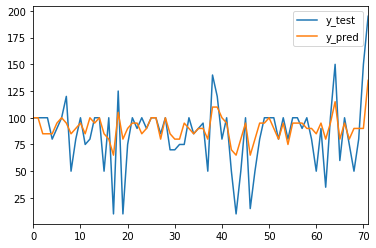

In [81]:
model = AcceptanceModel(LinearSVC(loss='epsilon_insensitive'), step=5, zero_one=True)
#model = AcceptanceModel(KerasModel(epochs=300), zero_one=True)
xTrain_, yTrain_ = xTrain, yTrain
#xTrain_, yTrain_ = da.fit_predict(xTrain, yTrain, distribution=True, distance=5, retarget=True, combine=True)
model.fit(xTrain_, yTrain_)
yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))

/home/franck/anaconda3/envs/thesis/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


gain_mean:  31.73611111111111


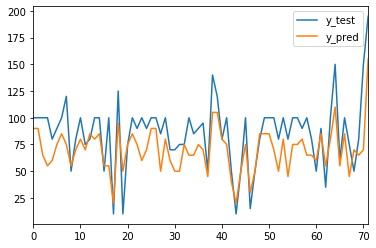

In [82]:
model = AcceptanceModel(PassiveAggressiveClassifier(), step=5, zero_one=True)
xTrain_, yTrain_ = xTrain, yTrain
#xTrain_, yTrain_ = da.fit_predict(xTrain, yTrain, distribution=True, distance=5, retarget=True, combine=True)
model.fit(xTrain_, yTrain_)
yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))

gain_mean:  83.125


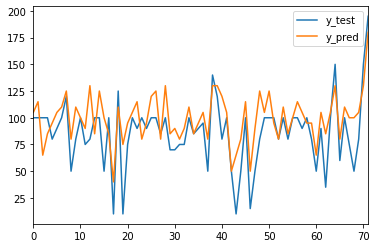

In [83]:
model = AcceptanceModel(LogisticRegression(solver='lbfgs'), step=5, zero_one=True)
xTrain_, yTrain_ = xTrain, yTrain
da = DACombine()
xTrain_, yTrain_ = da.fit_predict(xTrain, yTrain, distribution=True, distance=15, retarget=True, combine=True)
model.fit(xTrain_, yTrain_)
yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))

gain_mean:  82.98611111111111


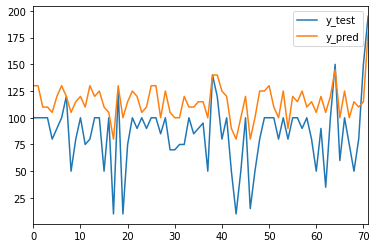

In [84]:
model = AcceptanceModel(LinearRegression(), step=5, zero_one=True)
xTrain_, yTrain_ = xTrain, yTrain
#xTrain_, yTrain_ = da.fit_predict(xTrain, yTrain, distribution=True, distance=5, retarget=True, combine=True)
model.fit(xTrain_, yTrain_)
yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))

gain_mean:  77.08333333333333


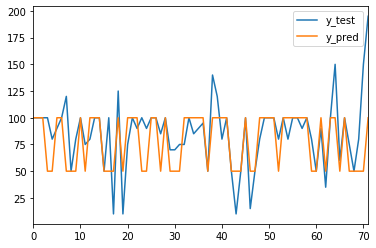

In [85]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1', solver='saga', multi_class='ovr')
model.fit(xTrain_, yTrain_.ravel())

yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))

In [86]:
from utils.data_augmentation import DASampling

gxTrain, gyTrain = DASampling().generate_data(xTrain, yTrain, size=10000)

gain_mean:  59.513888888888886
gain ratio:  0.46109130715824076


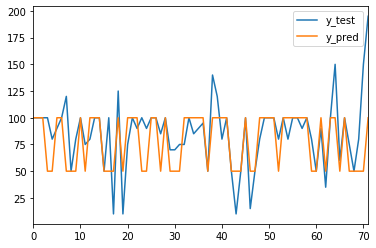

In [87]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

#model = MLPClassifier(hidden_layer_sizes=(1000,), )
model = PassiveAggressiveClassifier(max_iter=1000, tol=1e-4)
model.fit(gxTrain, gyTrain.ravel())

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
print("gain ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))

gain_mean:  68.05555555555556
gain ratio:  0.5638950553424238


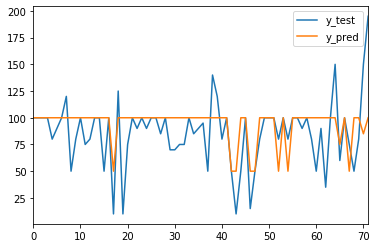

In [90]:
for _ in range(200):
    model.partial_fit(xTrain, yTrain.ravel())

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
print("gain ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))

In [91]:
gyTrain.mean(0), yTrain.mean(0), yTest.mean()

(array([78.8275]), array([78.64485981]), 85.83333333333333)